In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
def compute_ave_corr_for_comps(data_frame, comparisons):
    def compute_ave(data_frame, comp):
        ordered = data_frame[data_frame['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = data_frame[data_frame['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        proportion = (len(corr)) / len(temp)
        return proportion
    proportion_correct = 0
    
    for i in comparisons:
        proportion_correct += compute_ave(data_frame, i)
        
    return proportion_correct / len(comparisons)

In [3]:
def make_graph(data_frame):
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    distances = [0, 2, 4, 16, 68, 'many']
    # For different graph look reverse distances list (make sure to alter elif statment in graph_for_distance func)
    distances.reverse()
    zero_placing = 8

    def average_for_comp(data_frame, comp):
        ordered = data_frame[data_frame['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = data_frame[data_frame['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        proportion = (len(corr)) / len(temp)
        return proportion

    def graph_for_distance(index, comparisons, distances, data_frame, zp):
        # for each comparison for this distance (i.e. 4 and 16) add the average to the y array in order (FOR COMP = DISTANCE, set to 0.5)
        y = []
        for i in range(len(distances)):
            if i == index:
                y.append(0.5)
            # Switch sign if distances list is reversed
            elif i > distances.index(distances[index]):
                y.append(average_for_comp(data_frame, [distances[index], distances[i]]))
            else:
                y.append(average_for_comp(data_frame, [distances[i], distances[index]]))
        x = [1, 2, 3, 4, 5, zp]

        # graph the line:
        color = 'black'
        marker = 'o'

        #colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
        colors = ['black', 'gray', 'black', 'gray', 'black', 'gray']
        color = colors[index]
        #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
        #marker = markers[index]
        linestyles = ['-', '--', '-', '--', '-', '--',]
        linestyle = linestyles[index]

        for i in range(len(y)):
            # can switch sign for different graph look
            if i < index:
                y[i] = 1 - y[i]

        # Graph line
        ax.plot(x, y, clip_on = False, linestyle = linestyle, color = color, marker = marker, label=distances[index])
        plt.text(x[index],
                 y[index],
                 '  ' + str(distances[index]),
                 verticalalignment = 'top')

    fig, ax = plt.subplots()
    plt.title('Cross Category Recency Judgements')
    plt.ylabel("Probability of Judging 'A' More Recent")
    plt.xlabel("Cards Since 'A'")
    #plt.xticks(range(0, len(distances)))
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0,1,5))
    plt.xlim(0.6, zero_placing+0.4)
    plt.xticks([1, 2, 3, 4, 5, zero_placing], distances)
    ax.yaxis.set_ticks_position('both')

    for i in range(len(distances)):
        graph_for_distance(i, comparisons, distances, data_frame, zero_placing)
        ax.plot([1, 2, 3, 4, 5, zero_placing],
                [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
                marker = '.',
                color = 'white',
                linestyle = 'None')

    plt.text(zero_placing - 0.575, 0.325, 'Cards')
    plt.text(zero_placing - 0.675, 0.275, "Since 'B'")
    plt.show()

In [4]:
%store -r before_score_removal
data_frame = before_score_removal

In [5]:
criteria_count = 0
for i in data_frame['uniqueid'].unique():
    df = data_frame[data_frame['uniqueid'] == i]
    zeros = compute_ave_corr_for_comps(df, [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many")])
    twos = compute_ave_corr_for_comps(df, [(0, 2), (2, 4), (2, 16), (2, 68), (2, "many")])
    fours = compute_ave_corr_for_comps(df, [(0, 4), (2, 4), (4, 16), (4, 68), (4, "many")])
    sixteens = compute_ave_corr_for_comps(df, [(0, 16), (2, 16), (4, 16), (16, 68), (16, "many")])
    sixtyfours = compute_ave_corr_for_comps(df, [(0, 68), (2, 68), (4, 68), (16, 68), (68, "many")])
    manys = compute_ave_corr_for_comps(df, [(0, "many"), (2, "many"), (4, "many"), (16, "many"), (68, "many")])
    all_comps = compute_ave_corr_for_comps(df, [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")])
    if (zeros < 0.875 or twos < 0.65 or fours < 0.6 or sixteens < 0.6 or sixtyfours < 0.65 or manys < 0.7 or all_comps > 0.975):
        criteria_count += 1
        data_frame = data_frame.drop(df.index)

criteria_count

195

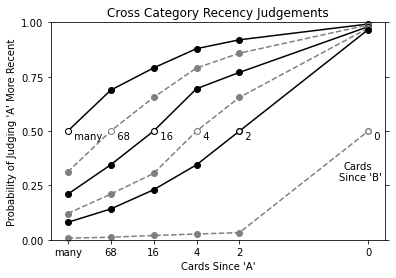

'\nzeros < 0.9 or twos < 0.7 or fours < 0.65 or sixteens < 0.65 or sixtyfours < 0.65 or manys < 0.75 or all_comps > 0.95: 250\nzeros < 0.875 or twos < 0.65 or fours < 0.6 or sixteens < 0.6 or sixtyfours < 0.65 or manys < 0.7 or all_comps > 0.95: 199 (graph still looks beautiful)\nzeros < 0.85 or twos < 0.6 or fours < 0.6 or sixteens < 0.6 or sixtyfours < 0.6 or manys < 0.7 or all_comps > 0.975: 170 (graph still looking finnnnne as hell)\nzeros < 0.80 or twos < 0.6 or fours < 0.55 or sixteens < 0.55 or sixtyfours < 0.6 or manys < 0.65 or all_comps > 0.98: 147 (looks good still)\n\n'

In [6]:
make_graph(data_frame)
'''
zeros < 0.9 or twos < 0.7 or fours < 0.65 or sixteens < 0.65 or sixtyfours < 0.65 or manys < 0.75 or all_comps > 0.95: 250
zeros < 0.875 or twos < 0.65 or fours < 0.6 or sixteens < 0.6 or sixtyfours < 0.65 or manys < 0.7 or all_comps > 0.95: 199 (graph still looks beautiful)
zeros < 0.85 or twos < 0.6 or fours < 0.6 or sixteens < 0.6 or sixtyfours < 0.6 or manys < 0.7 or all_comps > 0.975: 170 (graph still looking finnnnne as hell)
zeros < 0.80 or twos < 0.6 or fours < 0.55 or sixteens < 0.55 or sixtyfours < 0.6 or manys < 0.65 or all_comps > 0.98: 147 (looks good still)
zeros < 0.875 or twos < 0.65 or fours < 0.6 or sixteens < 0.6 or sixtyfours < 0.65 or manys < 0.7 or all_comps > 0.975: 195 
'''

In [7]:
'''
Recreating the RT graph from the JOI vs JOR paper by Mark Howard

Takes in a specifiede pandas dataframe with the correct fields from
the JOR v1.0 or v1.1 experiment and outputs a rt graph in the manner
of the JOI vs JOR paper.
'''
def recreate_rt_graph(df):
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    #distances = [0, 2, 4, 16, 68, 'many']
    distances = ['many', 68, 16, 4, 2, 0]

    '''
    '''
    def average_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        return corr["rt"].mean()
    
    
    '''
    '''
    def ste_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        # print(corr['rt'].sem()) #Coulda, shoulda, woulda
        return corr["rt"].std() / math.sqrt(len(corr))
    

    '''
    '''
    def graph_for_distance(more_recent_item, comparisons, distances, df):
        y = []
        x = []
        yerr = []
        for i in range(len(distances)):
            if i < more_recent_item:
                x.append(distances[i])
                y.append(average_for_comp(df, [distances[more_recent_item], distances[i]]))
                yerr.append(ste_for_comp(df, [distances[more_recent_item], distances[i]]))

        x = np.array(x)
        y = np.array(y)
        yerr = np.array(yerr)
        
        # graph the line:
        color = 'black'
        marker = 'o'

        #colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
        colors = ['lightgray', 'silver', 'darkgrey', 'gray', 'dimgrey', 'black']
        color = colors[more_recent_item]
        #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
        #marker = markers[index]

        # Graph line
        #ax.plot(x, y, clip_on = False, color = color, marker = marker, label=distances[more_recent_item])
        #ax.fill_between(x, y-yerr, y+yerr, alpha=0.7, edgecolor=color, facecolor=color)
        ax.errorbar(x, y, yerr=yerr, clip_on = False, color = color, marker = marker, label=distances[more_recent_item])

    fig, ax = plt.subplots()
    plt.title('Response Time In Cross Category Judgements')
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Lag to the less recent probe')
    ax.yaxis.set_ticks_position('both')

    for i in range(len(distances)):
        if not distances[i] == 'many':
            graph_for_distance(i, comparisons, distances, df)

    lgd = plt.legend(title = 'Lag to the more\n  recent probe', fancybox=True, bbox_to_anchor=(1.32, 1))
    plt.savefig('joir_rt_mimic.pdf', format='pdf', dpi=1200, bbox_extra_artists=[lgd], bbox_inches='tight')
    plt.show()

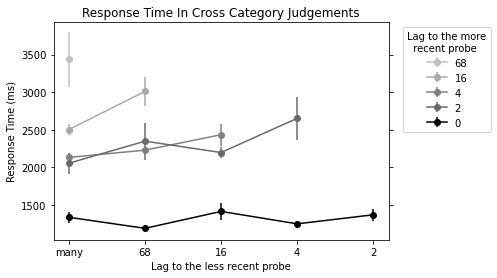

In [8]:
recreate_rt_graph(data_frame)

# Find graphs with average 0 of above 10%
# Find graphs with average "many" of 
'''
count = 0

for i in ['uniqueid'].unique():
    count += 1
    print(i)
    print(compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many")]))
    make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)
'''

# Graphs that would be eliminated with a 90% 0-comparison threshold
count = 0
for i in data_frame['uniqueid'].unique():
    val = compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many")])
    if (val < 0.9):
        count += 1
        print(val)
        print(i)
        make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)

# Graphs that would be eliminated with a __ many-comparison threshold
count = 0
for i in data_frame['uniqueid'].unique():
    val = compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, "many"), (2, "many"), (4, "many"), (16, "many"), (68, "many")])
    if (val < 0.75):
        count += 1
        print(val)
        print(i)
        make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)

# Graphs that would be eliminated with a __ 2-comparison threshold, 6 for over 90% -- good looking data
count = 0
for i in data_frame['uniqueid'].unique():
    val = compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, 2), (2, 4), (2, 16), (2, 68), (2, "many")])
    if (val < 0.7):
        count += 1
        print(val)
        print(i)
        make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)

# Graphs that would be eliminated with a __ 4-comparison threshold, 5 below 70% correct

count = 0
for i in data_frame['uniqueid'].unique():
    val = compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, 4), (2, 4), (4, 16), (4, 68), (4, "many")])
    if (val < 0.65):
        count += 1
        print(val)
        print(i)
        make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)

# Graphs that would be eliminated with a __ 16-comparison threshold,  below 70% correct

count = 0
for i in data_frame['uniqueid'].unique():
    val = compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, 16), (2, 16), (4, 16), (16, 68), (16, "many")])
    if (val < 0.65):
        count += 1
        print(val)
        print(i)
        make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)

# Graphs that would be eliminated with a __ 68-comparison threshold,  below 70% correct

count = 0
for i in data_frame['uniqueid'].unique():
    val = compute_ave_corr_for_comps(data_frame[data_frame['uniqueid'] == i], [(0, 68), (2, 68), (4, 68), (16, 68), (68, "many")])
    if (val < 0.65):
        count += 1
        print(val)
        print(i)
        make_graph(data_frame[data_frame['uniqueid'] == i])

print(count)